# Homework 4

The American Community Survey (ACS) is a large survey of households
and individuals in the United States, carried out by the US
government on a continuous basis (around 3.5 million people are
contacted per year).  It is arguably the most authoritative source
of information about the demographic composition of the US
population, and is used for many purposes in academic research,
government, public policy, and in private industry.

Some of the questions in the ACS are about sensitive topics, and therefore are only released in aggregate form. The "public use microsample" (PUMS) is a set of individual ACS responses that only includes information that has been deemed safe for public release at the individual level. Here we will work with a subset of the ACS/PUMS data.

You will need to refer to the documentation to know what the ACS variable names mean: **[ACS PUMS Codebooks](https://www.census.gov/programs-surveys/acs/microdata/documentation/2018.html)** Scroll down for data dictionary 2018 "1-year" ACS/PUMS, available in several formats. This file is also available as a [PDF on our Google Drive](https://drive.google.com/file/d/1Oact1X4F1USo8rhAU9w4AjhEbFhwpK19/view?usp=drive_link).

For this course, we are providing a simplified version of the ACS/PUMS data from 2018. It contains a random subset of the cases and a selected subset of variables.

Note that many PUMS variables are described as being "household" or "individual" variables. These refer to characteristics of households (one or more people living at the same address) or to characteristics of individual people, respectively.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
acs = pd.read_csv("pums_short.csv.gz")

## Question 1

### Q 1.a

Display the number of rows and columns in the table `acs` as well as the column names.

In [9]:
# Print the number of rows and columns
print(f"Number of rows: {acs.shape[0]}")
print(f"Number of columns: {acs.shape[1]}")

# Print the column names
print("Column names:", acs.columns.tolist())


Number of rows: 276632
Number of columns: 31
Column names: ['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP', 'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV', 'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT', 'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP']


### Q 1.b

Using the codebook, investigate the `"R65"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Produce a plot that shows the distribution of `"R65"` or its key features.
* Interpret the plot: what would say is a typical for for `"VALP"`?
* Compute the cumulative proportions of this variable.
* What proportion of households have either 0 or 1 person aged 65 or older?

The information that is contained in this column is the number of house hold members over the age of 65.
This data is quantative discrete.

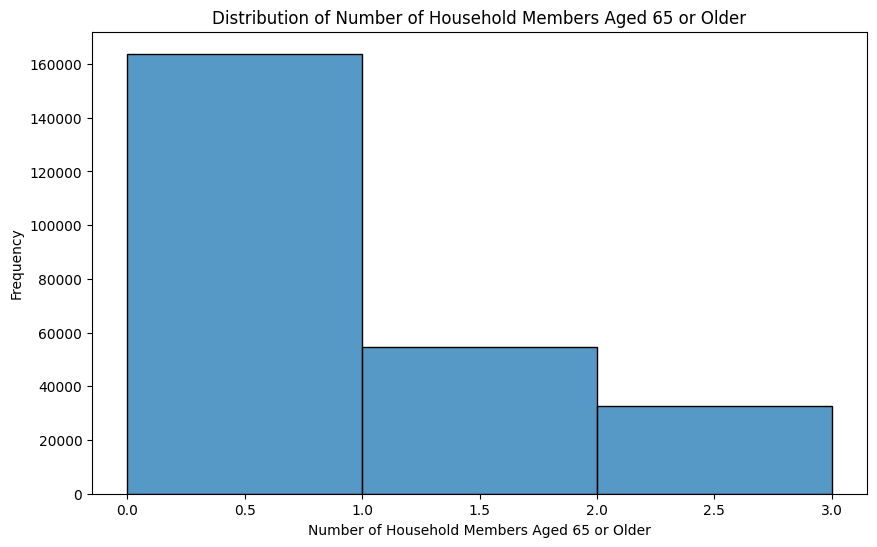

In [10]:
# Plot the distribution of the "R65" column
plt.figure(figsize=(10, 6))
sb.histplot(acs['R65'].dropna(), bins=range(int(acs['R65'].max()) + 2), kde=False)
plt.title('Distribution of Number of Household Members Aged 65 or Older')
plt.xlabel('Number of Household Members Aged 65 or Older')
plt.ylabel('Frequency')
plt.show()

The number that is typical for  households is 0-1 since that has the highest frequency.

In [6]:
# Compute the cumulative proportion for R65
r65_counts = acs['R65'].value_counts().sort_index()
r65_cumulative = r65_counts.cumsum() / r65_counts.sum()

# Display the cumulative proportions
print(r65_cumulative)

R65
0.0    0.652720
1.0    0.869787
2.0    1.000000
Name: count, dtype: float64


In [11]:
print("Using the table above we can see that 0.869787 of the households have 0 or 1 members aged 65 or older.")

Using the table above we can see that 0.869787 of the households have 0 or 1 members aged 65 or older.


### Q 1.c

Using the codebook, investigate the `"VALP"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Produce a plot that shows the distribution of `"VALP"` or its key features.
* Interpret the plot: what would you say is a typical for for `"VALP"`?
* Using numerical summaries, compute the proportion of households that are have less than 50,000 in property value, less than 100,000 in property value, and less than 200,000 in property value.
* Compute the 0.1, 0.5, and 0.75 quantiles of `"VALP"`.

The VALP column contains information about the property value of households.
 This data is quantitative and continuous.


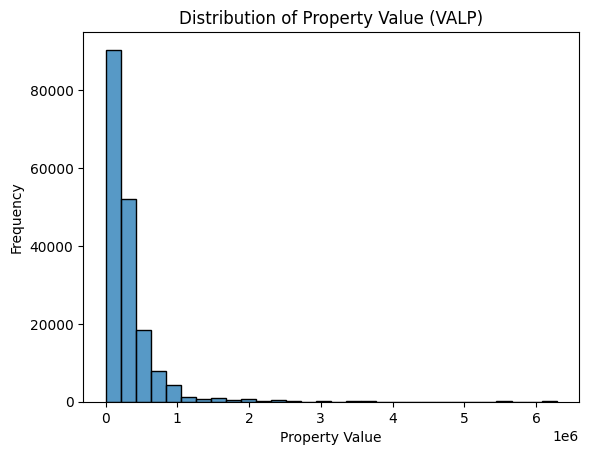

The typical value for VALP appears to be around 100,000 to 200,000.
Proportion of households with property value less than 50,000: 0.05
Proportion of households with property value less than 100,000: 0.13
Proportion of households with property value less than 200,000: 0.29
Quantiles of VALP:
0.10     60000.0
0.50    210000.0
0.75    375000.0
Name: VALP, dtype: float64


In [17]:
print("The VALP column contains information about the property value of households.")
print(" This data is quantitative and continuous.")

# Plot the distribution of the "VALP" column
valp_hist = sb.histplot(data=acs, x='VALP', bins=30)
plt.title('Distribution of Property Value (VALP)')
plt.xlabel('Property Value')
plt.ylabel('Frequency')
plt.show()

print("The typical value for VALP appears to be around 100,000 to 200,000.") 

# Compute the proportion of households with property values less than 50,000, 100,000, and 200,000
less_than_50k = (acs['VALP'] < 50000).mean()
less_than_100k = (acs['VALP'] < 100000).mean()
less_than_200k = (acs['VALP'] < 200000).mean()

print(f"Proportion of households with property value less than 50,000: {less_than_50k:.2f}")
print(f"Proportion of households with property value less than 100,000: {less_than_100k:.2f}")
print(f"Proportion of households with property value less than 200,000: {less_than_200k:.2f}")

# Compute the 0.1, 0.5, and 0.75 quantiles of "VALP"
quantiles = acs['VALP'].quantile([0.1, 0.5, 0.75])
print("Quantiles of VALP:")
print(quantiles)




### Q 1.d

Using the codebook, investigate the `"REGION"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Using the `replace` method for Series objects, replace the numbers in the `"REGION"` column with the names of the regions. Call this new column `"REGION_name"`.
* Produce a plot that shows the distribution of `"REGION_name"` or its key features.
* Calculate the distribution of the `"REGION_name"` column and print out the results. What proportion of households are in the Northeast and the South combined?




## Question 2

### Q 2.a

Review the `"ST"` column in the code book. We can see that the values for `"ST"` are numbers in the data set. Should we consider these to be *nominal* data? Why or why not?

### Q 2.b

Below are two lists with the state codes and the state names listed in the code book for "ST".

Use these with the `replace` method for Series objects to get a new version of the `"ST"` column with nicer, easier to read names. Call this new column `"ST_name"`. Demonstrate your results by printing out the state name of the row at position 101,206 in the table.

In [ ]:
st_nums = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]
st_names = "Alabama/AL,Alaska/AK,Arizona/AZ,Arkansas/AR,California/CA,Colorado/CO,Connecticut/CT,Delaware/DE,District of Columbia/DC,Florida/FL,Georgia/GA,Hawaii/HI,Idaho/ID,Illinois/IL,Indiana/IN,Iowa/IA,Kansas/KS,Kentucky/KY,Louisiana/LA,Maine/ME,Maryland/MD,Massachusetts/MA,Michigan/MI,Minnesota/MN,Mississippi/MS,Missouri/MO,Montana/MT,Nebraska/NE,Nevada/NV,New Hampshire/NH,New Jersey/NJ,New Mexico/NM,New York/NY,North Carolina/NC,North Dakota/ND,Ohio/OH,Oklahoma/OK,Oregon/OR,Pennsylvania/PA,Rhode Island/RI,South Carolina/SC,South Dakota/SD,Tennessee/TN,Texas/TX,Utah/UT,Vermont/VT,Virginia/VA,Washington/WA,West Virginia/WV,Wisconsin/WI,Wyoming/WY,Puerto Rico/PRa".split(",")

### Q 2.c

Review the codebook for the `PUMA` column. The description notes that we need to "use with ST for unique code." In other words, the same PUMA code may appear in multiple states, so knowing just the PUMA code is not sufficient to know where a household lives.

Verify this result by using `groupby` to create a tall table that contains the number of households in each "ST_name" and "PUMA" combination (hint: recall the `.size()` method). Use the `.reset_index()` method on this result to make it a little easier to work with. Call this table `ST_PUMA`.

Show that PUMA number 100 appears in multiple states.


### Q 2.d

For each state, find the size (in terms of households) of the largest PUMA in that state.


### Q 2.e

For each `ST_name` and `PUMA` combination, add up the total income of all households. Use `.reset_index(name = "total_income")` to make the table a little easier to work with.

Graph the distribution of total income per ST_state-PUMA combination. Using the graph, answer the following questions:

* What is a typical value for these total incomes? 
* Where do most of the observations falls? 
* Do you see about equal variation across the range of the `total_income` values. 

(Note: there is a good chance the graph axes will be in "scientific notation." A value like 3e7 means $3 \times 10^7$.)
